# Part II - Prosper Loans
   ## by Vicente Peña y Lillo

## Investigation Overview

The one of the main thoughts that people had at the moment of lending money is if they are going to paid back. So the main focus of this explanatory analysis is to determine wich features has relation with the risk of the borrowers.

For the reason explained before and after the exploratory analysis, were chosen the following figures:

* The distribution of the BorrowerRate, OnTimeRatio and EmploymentStatusDuration, and their relationship with the variable of interest ProsperScore. 

    > Chosen because their condition of continous variables and commonly thought of clear relation with the borrower risk.

* The relationship between the EmploymentStatus and IncomeRange vs the variable of interest ProsperScore.

    > Chosen and arranged together because they relate to each other and showna clear relationship with the variable of interest.

* The highest and lowest states according to there borrowing rate.

    > This figure show a shockinly relationship between the state and the interest rate.

* The highest and lowest scored occupations correlated to BorrowerRate and ProsperScore.

    > Figure prooving that the occupation relate with the borrowing rate and the prosper score. 


## Dataset Overview

The dataset contains 113,937 loans with 81 variables, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [64]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [65]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

# Copying and cutting the variables of interest
loans.ListingCreationDate = pd.to_datetime(loans.ListingCreationDate)
df = loans.copy()[loans.ListingCreationDate >= '2009-7-1']

features = ['ProsperScore','Term', 'BorrowerRate','ListingCategory (numeric)', 'EmploymentStatus',
            'EmploymentStatusDuration', 'BorrowerState', 'Occupation', 'IncomeRange', 'IncomeVerifiable',
            'TotalProsperPaymentsBilled', 'OnTimeProsperPayments']

df = df[features]

# Eliminate 'ProsperScore' outliers
df = df[df.ProsperScore != 11]

# Adding labels to Listing Category
listing_labels = ['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use',
                  'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans',
                  'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation',
                  'Wedding Loans']
l = df['ListingCategory (numeric)'].values
listing =[]
for i in range(len(l)):
    listing.append(listing_labels[l[i]])

df['ListingCategory'] = listing

#Creating the On Time Payment Ratio variable
df['OnTimeRatio'] = df.OnTimeProsperPayments/df.TotalProsperPaymentsBilled

## Borrower Rate / On Time Payment Ratio / Employment Status Duration vs Prosper Score

The following figure show the distributions of the `BorrowerRate`, `OnTimeRatio` and `EmploymentStatusDuration`, and their relationship with the variable of interest `ProsperScore`.

Implying the following:
* `BorrowerRate` presents a negative correlation with the `ProsperScore`.
* `OnTimeRatio` and `EmploymentStatusDuration` doesn't show a relation with the prosper score. This could be related to the distribution of these features, where on time payment the ratio is skeewed to the left, while employment duration is skeewed to the left.

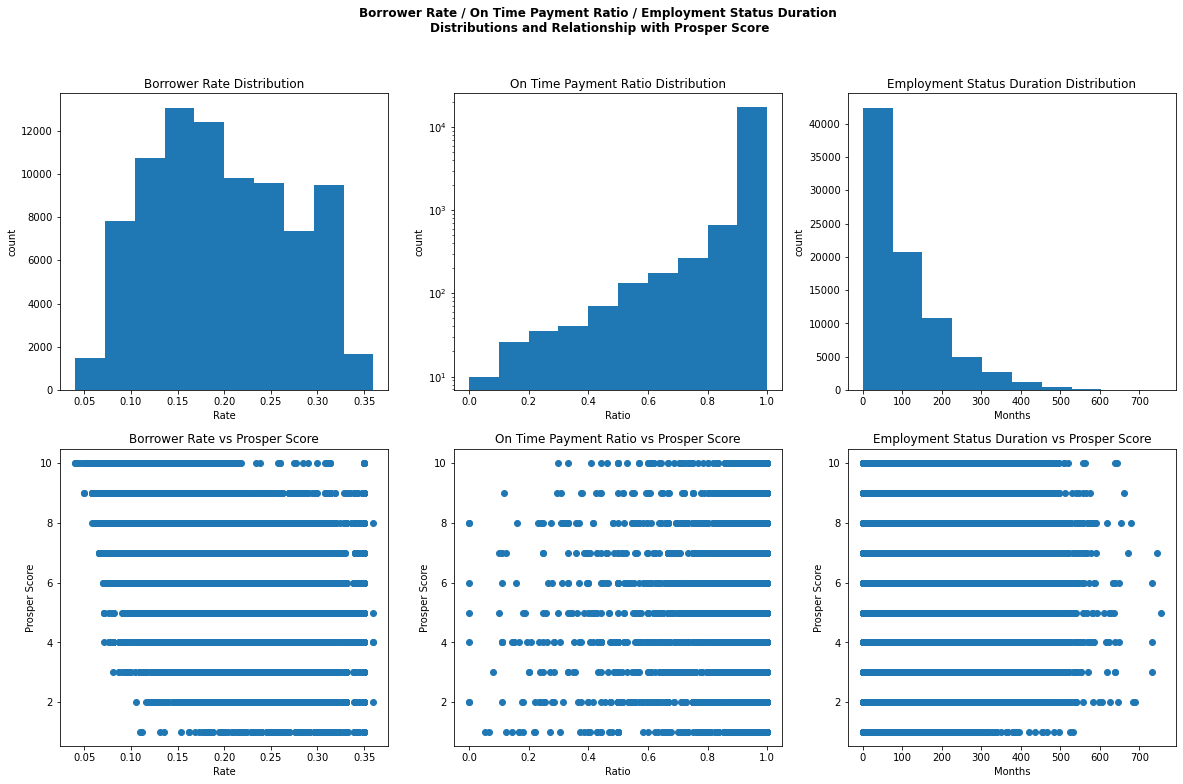

In [66]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,sharey=False,sharex=False,figsize=(20,12))
ax1.hist(df.BorrowerRate);
ax1.set_title('Borrower Rate Distribution');
ax1.set_ylabel('count');
ax1.set_xlabel('Rate');
ax2.hist(df.OnTimeRatio);
ax2.set_title('On Time Payment Ratio Distribution');
ax2.set_ylabel('count');
ax2.set_yscale('log');
ax2.set_xlabel('Ratio');
ax3.hist(df.EmploymentStatusDuration);
ax3.set_title('Employment Status Duration Distribution');
ax3.set_ylabel('count');
ax3.set_xlabel('Months');

ax4.scatter(df.BorrowerRate,df.ProsperScore);
ax4.set_title('Borrower Rate vs Prosper Score');
ax4.set_ylabel('Prosper Score');
ax4.set_xlabel('Rate');
ax5.scatter(df.OnTimeRatio,df.ProsperScore);
ax5.set_title('On Time Payment Ratio vs Prosper Score');
ax5.set_ylabel('Prosper Score');
ax5.set_xlabel('Ratio');
ax6.scatter(df.EmploymentStatusDuration,df.ProsperScore);
ax6.set_title('Employment Status Duration vs Prosper Score');
ax6.set_ylabel('Prosper Score');
ax6.set_xlabel('Months');

plt.suptitle('Borrower Rate / On Time Payment Ratio / Employment Status Duration \n'
             'Distributions and Relationship with Prosper Score', weight='bold');

## Emplyment Status / Income Range vs Prosper Score

The following figure show the relationship between the `EmploymentStatus` and `IncomeRange` vs the variable of interest `ProsperScore`.

Implying the following:
* The **Full-time** and **Part-time** employees have a better `ProsperScore` than the not employed or self employed people.
* `IncomeRange` is positive correlated to `ProsperScore`.
* This features maybe related to each other being directly proportional the salary with the type of job.

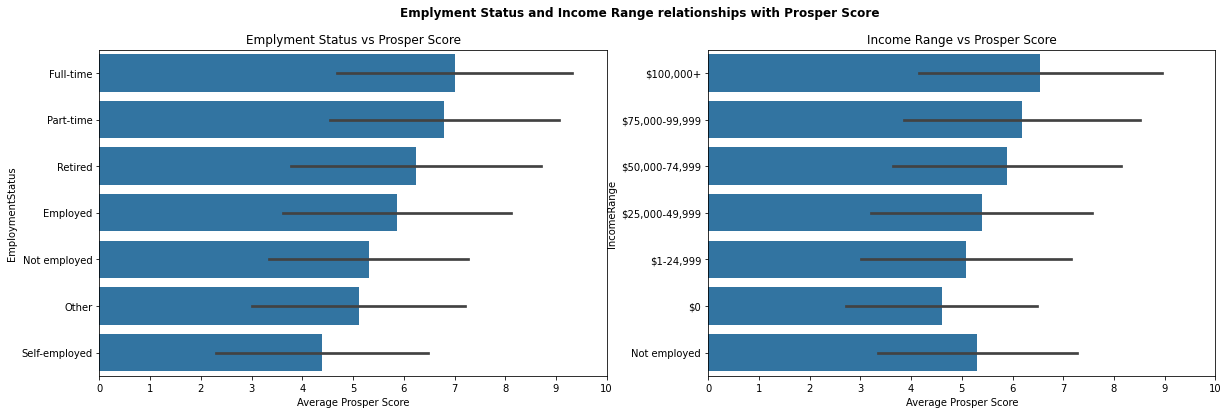

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=False,sharex=True,figsize=(20,6))

plt.subplot(1,2,1)
df_sub = df.groupby('EmploymentStatus').mean()
score_order = df_sub.sort_values('ProsperScore',ascending=False).index
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'ProsperScore', y = 'EmploymentStatus',
            color = base_color, order = score_order, ci = 'sd');
plt.xlabel('Average Prosper Score');
plt.xticks(ticks=np.arange(0,11,1));
plt.title('Emplyment Status vs Prosper Score');

plt.subplot(1,2,2)
df_sub = df.groupby('IncomeRange').mean()
order_income = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed']
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'ProsperScore', y = 'IncomeRange',
            color = base_color, order = order_income, ci = 'sd');
plt.xlabel('Average Prosper Score');
plt.xticks(ticks=np.arange(0,11,1));
plt.title('Income Range vs Prosper Score');

plt.suptitle('Emplyment Status and Income Range relationships with Prosper Score', weight='bold');

## Borrower State vs Borrower Rate

The following figure show the highest and lowest 5 states according to there borrowing rate.

Implying that the average borrowing rate deppends on the State, with highest rates for **AL** and the lowest for **DC**.

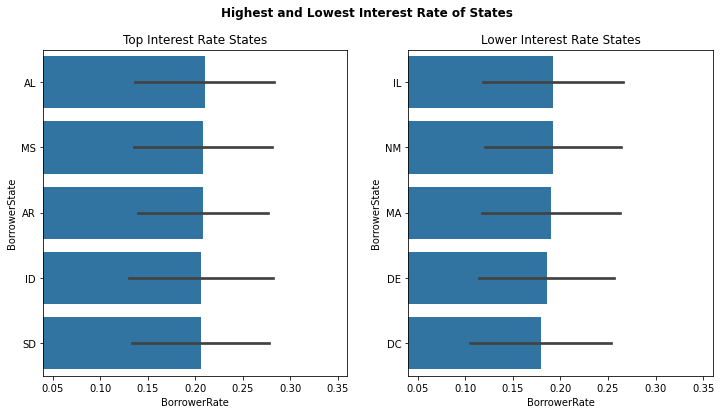

In [68]:
sub = df.groupby('BorrowerState').mean().sort_values('BorrowerRate',ascending=False).index
df_1 = df[df['BorrowerState'].isin(sub[:5])]
df_2 = df[df['BorrowerState'].isin(sub[-5:])]
    
base_color = sb.color_palette()[0]
plt.figure(figsize=(12,6))
ticks = np.arange(0,df['BorrowerRate'].max()+1,df['BorrowerRate'].max()/10)
plt.suptitle('Highest and Lowest Interest Rate of States', weight='bold');
    
plt.subplot(121);
plt.title('Top Interest Rate States');
plt.xlim((df['BorrowerRate'].min( ),df['BorrowerRate'].max()));
sb.barplot(data=df_1, x='BorrowerRate', y='BorrowerState', color=base_color, order=sub[:5], ci='sd');
    
plt.subplot(122);
plt.title('Lower Interest Rate States');
plt.xlim((df['BorrowerRate'].min(),df['BorrowerRate'].max()));
sb.barplot(data=df_2, x='BorrowerRate', y='BorrowerState', color=base_color, order=sub[-5:], ci='sd');


## Borrower Rate vs Prosper Score vs Occupations

The following figure show the 3 highest and lowest scored occupations correlated to `BorrowerRate` and `ProsperScore`.

Implying that there is a clear relationship between the `BorrowerRate`, `ProsperScore` and `Occupation`, where the `Occupation` is strengthed by the `BorrowerRate`.


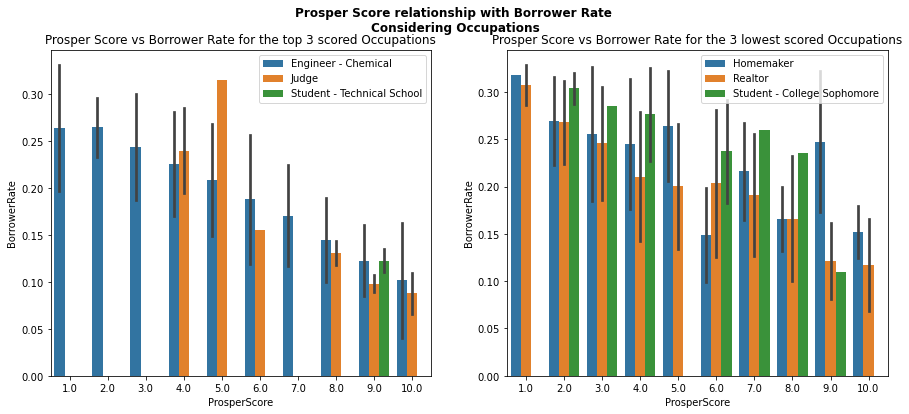

In [69]:
occ_1 = ['Student - Technical School', 'Judge', 'Engineer - Chemical']
s_df = df[df['Occupation'].isin(occ_1)]
occ_2 = ['Homemaker', 'Student - College Sophomore', 'Realtor']
s_df2 = df[df['Occupation'].isin(occ_2)]

fig, (ax1,ax2) = plt.subplots(2,1,sharey=True,sharex=True,figsize=(15,6))
n=10

plt.subplot(121);
plt.xlim(0,10);
sb.barplot(data=s_df, y='BorrowerRate', x='ProsperScore', hue='Occupation', ci='sd');
plt.legend();
plt.title('Prosper Score vs Borrower Rate for the top 3 scored Occupations');

plt.subplot(122);
plt.xlim(0,10);
sb.barplot(data=s_df2, y='BorrowerRate', x='ProsperScore', hue='Occupation', ci='sd');
plt.legend();
plt.title('Prosper Score vs Borrower Rate for the 3 lowest scored Occupations');

plt.suptitle('Prosper Score relationship with Borrower Rate \n'
             'Considering Occupations', weight='bold');

In [71]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 751818 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\vicen\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\vicen\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\vicen\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\vicen\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\vicen\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_